<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> Solving a linear system of equations </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.00 </h2>
</center>



<div id='toc' />

## Table of Contents
* [Introduction](#intro)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div id='intro' />

# Introduction
[Back to TOC](#toc)

In this jupyter notebook we will analyze two different way for solving a linear system of equations. The main idea is to verify computationally that _translating_ from a **theoretical** solution into a **computational** one is not necesarily a straightforward task and we must face some decisions.

The classical problem we will be solving is the following:
$$
\begin{equation}
    A\,\mathbf{x} = \mathbf{b}, \quad A \in \mathbb{R}^{n\times n}, \mathbf{x} \in \mathbb{R}^n, \text{ and } \mathbf{b} \in \mathbb{R}^n,
\end{equation}
$$
where we know $A$ and $\mathbf{b}$, and we are looking for $\mathbf{x}$.
The representation of the solution is the following:
$$
\begin{equation}
    \mathbf{x}=A^{-1}\,\mathbf{b}.
\end{equation}
$$
This _way_ for finding $\mathbf{x}$ can be implemented in two steps:
1. Compute $A^{-1}$,
2. Multiply $A^{-1}$ by $\mathbf{b}$.

This approach has been implemented in the function `solve_inverse`.

In [2]:
# This function solves a linear system of equation 
# in a NOT recomended way, we just include it here
# for comparison purposes. Please DON'T do this!
def solve_inverse(A,b):
    B = np.linalg.inv(A) # FORBIDDEN!!
    x = np.dot(B,b)
    return x

The other algorithm we will use is implemented in the function `np.linalg.solve` of NumPy.
In both cases, they receive the matrix $A$ and the right-hand-side $\mathbf{b}$.

Before we continue the analysis, we need to briefly explain how to build a random matrix $A$ and a random right-hand-side vector $\mathbf{b}$, this is achived in the next code:

In [3]:
# We use this to ensure the output is reproducible,
# what we do is to set a initial seed for the 
# pseudo-random number genrator.
np.random.seed(0)

# Here we define the dimension of the problem we will study
n = 10
# Here we generate 'A' and 'b'.
A = np.random.random((n,n)) # Warning: We hope the matrix is not singular!
b = np.random.random(n)

The following code compares the solution obtained by each approach for the small problem.

In [4]:
x1 = np.linalg.solve(A,b)
print('x1: ',x1)

x2 = solve_inverse(A,b)
print('x2: ',x2)

x1:  [-0.97479192  0.58866085  0.75411335  1.38384387 -0.35926582  0.39313497
  0.69899892  0.12335787 -0.72120104 -0.62434064]
x2:  [-0.97479192  0.58866085  0.75411335  1.38384387 -0.35926582  0.39313497
  0.69899892  0.12335787 -0.72120104 -0.62434064]


We should see that the output `x1` and `x2` are the same. More on this will be study in the course, what we will study now (and also later) is the time it takes to find $\mathbf{x}$ by both algorihtms.

In [5]:
%timeit np.linalg.solve(A,b)

9.73 μs ± 1.98 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%timeit solve_inverse(A,b)

The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
26.8 μs ± 13.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Do you notice a difference in the computation time?

To be able to undertand in more detail the _tendency_ we need to test it for several values of `n`.

In [7]:
# This line of code will help us to manipulate the output.
out = %timeit -o -q -n 10 -r 5 np.linalg.solve(A,b)

In [8]:
out.all_runs

[0.002354899000010846,
 0.00015362500005267066,
 0.0001284049999412673,
 0.00012420099994869815,
 0.00010872299992570333]

The following code solve 10 linear systems of equations from size $10\times 10$ upto $2000\times 2000$, and for each one we compute the average time for several ejecutions.

In [9]:
def generate_data_Axb():
    Ns = np.linspace(10,2000,10, dtype=int)
    time_solve = np.zeros(len(Ns))
    time_inv   = np.zeros(len(Ns))
    np.random.seed(0)
    for i, n in np.ndenumerate(Ns):
        print('working on n =',n)
        A = np.random.random((n,n))
        b = np.random.random(n)
        out = %timeit -o -q -n 5 -r 5 np.linalg.solve(A,b)
        time_solve[i] = out.average
        out = %timeit -o -q -n 5 -r 5 solve_inverse(A,b)
        time_inv[i]   = out.average
        print('time it took =',time_solve[i]+time_inv[i],'[sec]')
    return Ns, time_solve, time_inv


In [10]:
Ns, time_solve, time_inv = generate_data_Axb()

working on n = 10
time it took = 0.00011632432000169502 [sec]
working on n = 231
time it took = 0.0037166219999971873 [sec]
working on n = 452
time it took = 0.0072988977600016375 [sec]
working on n = 673
time it took = 0.04095715051999832 [sec]
working on n = 894
time it took = 0.06551627108000503 [sec]
working on n = 1115
time it took = 0.14492124819999389 [sec]
working on n = 1336
time it took = 0.24054471876001116 [sec]
working on n = 1557
time it took = 0.41404753275999157 [sec]
working on n = 1778
time it took = 0.4708162565600059 [sec]
working on n = 2000
time it took = 0.4855068360399946 [sec]


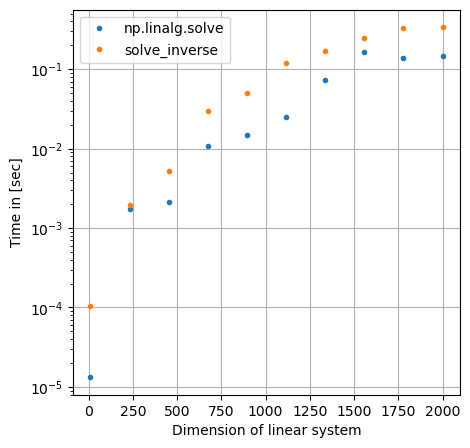

In [11]:
plt.figure(figsize=(5,5))
plt.semilogy(Ns, time_solve, '.', label="np.linalg.solve")
plt.semilogy(Ns, time_inv,   '.', label="solve_inverse")
plt.grid(True)
plt.ylabel('Time in [sec]')
plt.xlabel('Dimension of linear system')
plt.legend(loc='best')
plt.show()


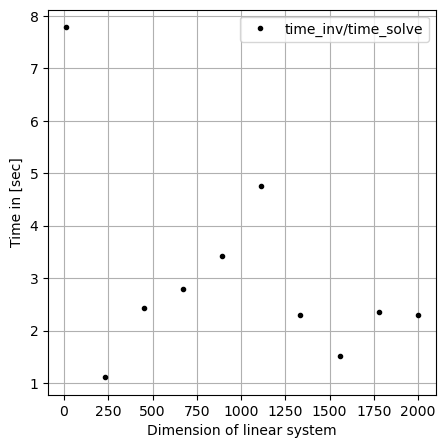

In [12]:
plt.figure(figsize=(5,5))
plt.plot(Ns, time_inv/time_solve, 'k.', label="time_inv/time_solve")
plt.grid(True)
plt.ylabel('Time in [sec]')
plt.xlabel('Dimension of linear system')
plt.legend(loc='best')
plt.show()

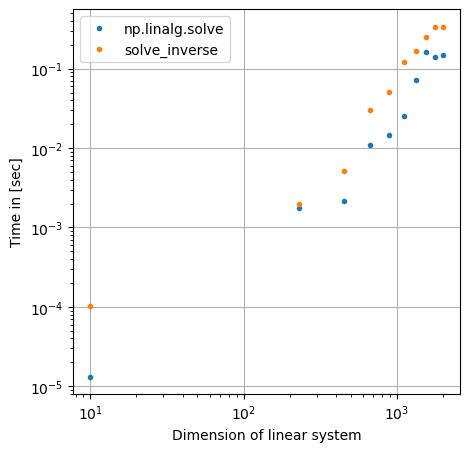

In [13]:
plt.figure(figsize=(5,5))
plt.loglog(Ns, time_solve, '.', label="np.linalg.solve")
plt.loglog(Ns, time_inv,   '.', label="solve_inverse")
plt.grid(True)
plt.ylabel('Time in [sec]')
plt.xlabel('Dimension of linear system')
plt.legend(loc='best')
plt.show()

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). v.1.0. DI UTFSM. March 2022._